<a href="https://colab.research.google.com/github/Ahmad-Alfin/Data-cleansing/blob/main/2318128_Visualisasi_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

Langkah awal ini bertujuan untuk mengimpor library utama yang akan digunakan.


*   Pandas berfungsi untuk membaca dan mengelola data dari file Excel.

*   Matplotlib digunakan untuk membuat berbagai jenis grafik seperti line chart dan bar chart.

*   Seaborn merupakan library tambahan untuk menghasilkan visualisasi yang lebih informatif dan estetik.









In [77]:
# Mengimpor pustaka yang digunakan dalam analisis dan visualisasi data
import pandas as pd              # Untuk manipulasi dan analisis data berbasis tabel
import matplotlib.pyplot as plt   # Untuk pembuatan visualisasi dasar (grafik)
import seaborn as sns             # Untuk mempercantik tampilan visualisasi

# Membaca File Excel

Dataset dibaca menggunakan fungsi pd.read_excel() dari pustaka Pandas.
Perintah data.head() menampilkan 5 baris pertama sebagai langkah verifikasi struktur kolom (seperti order_date, quantity, item_price, brand, city, dan province).
Langkah ini penting untuk memastikan data telah terimpor dengan benar sebelum dilakukan pengolahan lebih lanjut.

In [78]:
from google.colab import drive
drive.mount('/content/drive')

# Membaca file Excel yang telah diunggah ke Google Colab
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DataPenjualan_Cleansed.xlsx')

# Menampilkan beberapa data teratas untuk verifikasi struktur dataset
data.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,No,Tanggal,Nama_Toko,Produk,Jumlah,Total_Penjualan,Kota,Longitude,Latitude,Negara_Kode,Benua,Provinsi,Kode_Provinsi,Koordinat,Zona_Waktu
0,1,1-2-2020,TOKO MURAH,Jam Lokeswara,1000,Rp. 9.840.000,Jakarta,106.82274,-6.17447,ID,Asia,DKI Jakarta,ID-JK,POINT (-6.17447 106.82274),WIB
1,2,1-2-2020,TOKO MURAH,Batik Lontara,120,Rp. 8.400.000,Bandung,107.61102,-6.92155,ID,Asia,Jawa Barat,ID-JB,POINT (-6.92155 107.61102),WIB
2,3,1-2-2020,TOKO APRILIA SUKRISNI,Jam Lokeswara,6000,Rp. 62.910.000,Surabaya,112.73783,-7.24597,ID,Asia,Jawa Timur,ID-JI,POINT (-7.24597 112.73783),WIB
3,4,1-2-2020,TOKO APRILIA SUKRISNI,Jam Wish,408,Rp. 4.855.200,Medan,98.67383,3.58967,ID,Asia,Sumatera Utara,ID-SU,POINT (3.58967 98.67383),WIB
4,5,1-2-2020,TOKO APRILIA SUKRISNI,Batik Besurek,140,Rp. 1.162.000,Yogyakarta,102.25783,-1.35790,ID,Asia,DI Yogyakarta,ID-YO,POINT (-1.3579 102.25783),WIB


# Menambah Kolom GMV

Kolom GMV menunjukkan total nilai transaksi per baris data — ini membantu menghitung total penjualan.

In [79]:
# Menambahkan kolom GMV berdasarkan hasil perkalian quantity dan item_price
data['GMV'] = data['Jumlah'] * data['Total_Penjualan']

# Menampilkan hasil kolom baru
data[['Jumlah', 'Total_Penjualan', 'GMV']].head()

,Jumlah,Total_Penjualan,GMV
0,1000,Rp. 9.840.000,Rp. 9.840.000Rp. 9.840.000Rp. 9.840.000Rp. 9.8...
1,120,Rp. 8.400.000,Rp. 8.400.000Rp. 8.400.000Rp. 8.400.000Rp. 8.4...
2,6000,Rp. 62.910.000,Rp. 62.910.000Rp. 62.910.000Rp. 62.910.000Rp. ...
3,408,Rp. 4.855.200,Rp. 4.855.200Rp. 4.855.200Rp. 4.855.200Rp. 4.8...
4,140,Rp. 1.162.000,Rp. 1.162.000Rp. 1.162.000Rp. 1.162.000Rp. 1.1...


# Mengonversi dan Menambahkan Kolom Bulan Transaksi

Kita ubah kolom order_date menjadi format tanggal agar mudah diolah.
Lalu dibuat kolom order_month agar bisa menganalisis penjualan per bulan.

In [80]:
# Pastikan format tanggal sudah bersih
data['Tanggal'] = data['Tanggal'].astype(str).str.strip()
data['Tanggal'] = pd.to_datetime(data['Tanggal'], errors='coerce', format='mixed')

# Tambahkan kolom periode bulan
data['order_month'] = data['Tanggal'].dt.to_period('M')

# Agregasi GMV per bulan
gmv_bulanan = data.groupby('order_month', as_index=False)['GMV'].sum()

# Pastikan hasilnya tidak terlalu banyak
print("Jumlah bulan unik:", len(gmv_bulanan))
gmv_bulanan.head()




Jumlah bulan unik: 42


,order_month,GMV
0,2020-01,Rp. 9.840.000Rp. 9.840.000Rp. 9.840.000Rp. 9.8...
1,2020-02,Rp. 10.500.000Rp. 10.500.000Rp. 10.500.000Rp. ...
2,2020-03,Rp. 5.893.800Rp. 5.893.800Rp. 5.893.800Rp. 5.8...
3,2020-04,Rp. 11.200.000Rp. 11.200.000Rp. 11.200.000Rp. ...
4,2020-05,Rp. 4.800.000Rp. 4.800.000Rp. 4.800.000Rp. 4.8...


# Agregasi Data per Bulan

Data kemudian dikelompokkan (grouped) berdasarkan kolom order_month, lalu dijumlahkan total GMV per bulan menggunakan fungsi groupby() dan sum().
Tahap ini menghasilkan ringkasan penjualan bulanan yang siap divisualisasikan untuk melihat tren pertumbuhan penjualan dari waktu ke waktu.

In [81]:
# Membuat kolom order_month berdasarkan periode bulan
data['order_month'] = data['Tanggal'].dt.to_period('M')

# Pastikan kolom GMV sudah ada, kalau belum, buat dulu
if 'GMV' not in data.columns:
    data['GMV'] = data['Jumlah'] * data['Harga_Total']

# Agregasi GMV per bulan
gmv_bulanan = data.groupby('order_month')['GMV'].sum().reset_index()

print("Jumlah baris setelah agregasi:", len(gmv_bulanan))
gmv_bulanan.head()
# Ambil 12 bulan terakhir
gmv_bulanan = gmv_bulanan.tail(12)

Jumlah baris setelah agregasi: 42


# Membuat Grafik Garis (Line Chart)

Grafik ini menampilkan tren pertumbuhan GMV bulanan.

Sumbu X merepresentasikan periode bulan transaksi.

Sumbu Y menunjukkan total GMV setiap bulan.

Elemen seperti marker, grid, dan title digunakan untuk memperjelas interpretasi grafik.
Visualisasi ini membantu melihat pola peningkatan atau penurunan performa penjualan dari waktu ke waktu.

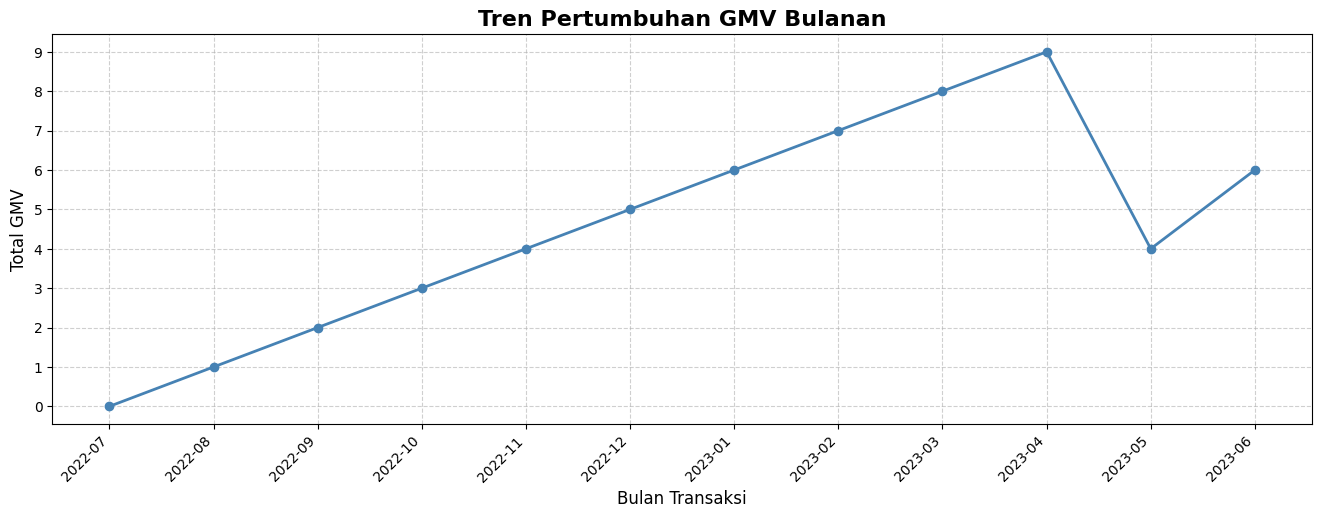

In [82]:
# Membuat kanvas grafik
fig, ax = plt.subplots(figsize=(14, 6))  # ukuran lebar agar tidak padat

# Membuat garis tren GMV bulanan
ax.plot(
    gmv_bulanan['order_month'].astype(str),
    gmv_bulanan['GMV'],
    color='steelblue',
    marker='o',
    linewidth=2
)

# Reset formatter sumbu Y agar tidak berulang
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

# Judul dan label sumbu
ax.set_title('Tren Pertumbuhan GMV Bulanan', fontsize=16, fontweight='bold')
ax.set_xlabel('Bulan Transaksi', fontsize=12)
ax.set_ylabel('Total GMV', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)

# Putar label sumbu X agar terbaca jelas
step = max(1, len(gmv_bulanan) // 12)
plt.xticks(gmv_bulanan['order_month'].astype(str)[::step], rotation=45, ha='right')

# Atur margin biar tidak terpotong
plt.subplots_adjust(left=0.08, right=0.98, bottom=0.25, top=0.9)

plt.show()


# Menambahkan Teks Informasi pada Plot

Anotasi digunakan untuk memberikan informasi tambahan secara langsung pada grafik.
Teks “Max GMV” ditampilkan pada titik dengan nilai GMV tertinggi, sehingga pembaca dapat dengan cepat mengidentifikasi bulan dengan performa penjualan terbaik.


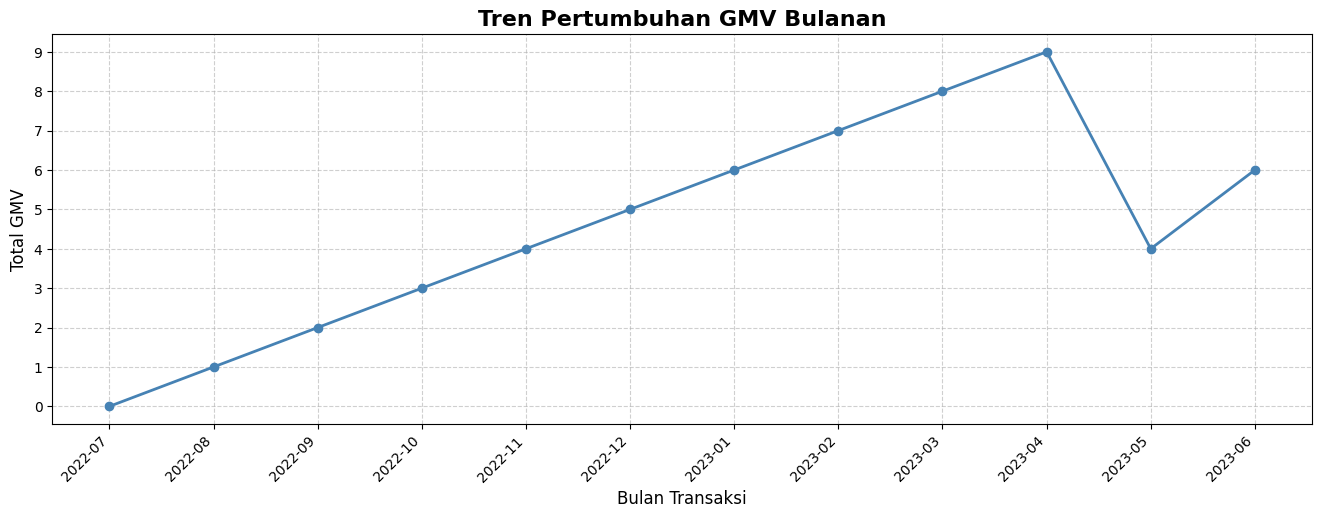

In [114]:
# Membuat kanvas grafik
fig, ax = plt.subplots(figsize=(14, 6))

# Plot garis tren GMV bulanan
ax.plot(
    gmv_bulanan['order_month'].astype(str),
    gmv_bulanan['GMV'],
    color='steelblue',
    marker='o',
    linewidth=2
)

# Format sumbu Y
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

# Judul dan label
ax.set_title('Tren Pertumbuhan GMV Bulanan', fontsize=16, fontweight='bold')
ax.set_xlabel('Bulan Transaksi', fontsize=12)
ax.set_ylabel('Total GMV', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)

# Putar label sumbu X
step = max(1, len(gmv_bulanan) // 12)
plt.xticks(gmv_bulanan['order_month'].astype(str)[::step], rotation=45, ha='right')

# 🔍 Cari titik GMV tertinggi
max_idx = gmv_bulanan['GMV'].idxmax()
max_month_label = gmv_bulanan.loc[max_idx, 'order_month']
max_value = gmv_bulanan.loc[max_idx, 'GMV']

# Atur margin
plt.subplots_adjust(left=0.08, right=0.98, bottom=0.25, top=0.9)
plt.show()
